# WIP - Restaurant Recommendation Dialog System

## Members:
- Karpiński, R.R. (Rafał)
- Pavan, L. (Lorenzo)
- Rodrigues Luchetti, G.L. (Gustavo)
- Teunissen, N.D. (Niels)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import search

## Reading 'dialog_acts.dat' into dataframe

In [2]:
with open('dialog_acts.dat', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip("\n").split(" ", 1), data))
    
df = pd.DataFrame(np.array(data), columns = ['label', 'text'])

In [3]:
df.head(3)

,label,text
0,inform,im looking for a moderately priced restaurant ...
1,inform,any part of town
2,inform,bistro food


## Pre-Processing
Looking for null values, irrelevant or noisy text (literally, removing 'tv_noise' and 'noise') and repeated values. Formatting labels into numbers.

In [4]:
# transforming labels into numbers
df['label_id'] = df['label'].factorize()[0]
label_dict = df[['label','label_id']].drop_duplicates().set_index('label_id')
label_dict

,label
label_id,
0,inform
1,confirm
2,affirm
3,request
4,thankyou
5,null
6,bye
7,reqalts
8,negate


## Building Baseline Systems

In [5]:
majority_class = df['label'].mode().to_string(index = False)
print(f"Majority class is '{majority_class}' ")

Majority class is 'inform' 


In [6]:
def df_majority_class(dataframe):
    """
    Classifies dialog based on the majority class label.
    Arguments:
        dataframe: a pandas dataframe that contains a column named text with utterances.
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    predictions = []
    for i in range(0,len(dataframe)):
        predictions.append(majority_class)
            
    return predictions
    
def df_keyword_matching(dataframe):
    """
    Rule-based prediction of dialog acts based on a colletion of utterances.
    Arguments:
        dataframe: a pandas dataframe that contains a column named text with utterances.
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    predictions = []
    for i in range(0,len(dataframe)):
        if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', df.loc[i,'text']):
            predictions.append('reqalts')
        elif search(r'\byes\b|\byeah\b|\bcorrect\b',df.loc[i,'text']):
            predictions.append('affirm')
        elif search(r'\bthank you\b', df.loc[i,'text']):
            predictions.append('thankyou')
        elif search(r'\bgoodbye\b|\bbye\b', df.loc[i,'text']):
            predictions.append('bye')
        elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', df.loc[i,'text']):
            predictions.append('confirm')
        elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', df.loc[i,'text']):
            predictions.append('request')
        elif search(r'\bno\b|\bnot\b', df.loc[i,'text']):
            predictions.append('negate')
        elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',df.loc[i,'text']):
            predictions.append('inform')
        elif search(r'\bdont\b', df.loc[i,'text']):
            predictions.append('deny')
        elif search(r'\bhello\b', df.loc[i,'text']):
            predictions.append('hello')
        elif search(r'\brepeat\b', df.loc[i,'text']):
            predictions.append('repeat')
        elif search(r'\bmore\b', df.loc[i,'text']):
            predictions.append('reqmore')
        elif search(r'\bstart\b', df.loc[i,'text']):
            predictions.append('restart')
        elif search(r'\bokay\b|\bkay\b',df.loc[i,'text']):
            predictions.append('ack')
        else:
            predictions.append('inform')
    return predictions

In [7]:
def single_majority_class(utterance):
    """
    Classifies dialog based on the majority class label.
    Arguments:
        utterance: string
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    
    return majority_class        
    
def single_keyword_matching(utterance):
    """
    Rule-based prediction of a dialog act based on a phrase.
    Arguments:
        utterance: string
    Returns:
        Returns the predicted dialog act.
    """
    utterance = utterance.lower()
    if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', utterance):
        return 'reqalts'
    elif search(r'\byes\b|\byeah\b|\bcorrect\b',utterance):
        return 'affirm'
    elif search(r'\bthank you\b', utterance):
        return 'thankyou'
    elif search(r'\bgoodbye\b|\bbye\b', utterance):
        return 'bye'
    elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', utterance):
        return 'confirm'
    elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', utterance):
        return 'request'
    elif search(r'\bno\b|\bnot\b', utterance):
        return 'negate'
    elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',utterance):
        return 'inform'
    elif search(r'\bdont\b', utterance):
        return 'deny'
    elif search(r'\bhello\b|\bhi\b|\bhey\b', utterance):
        return 'hello'
    elif search(r'\brepeat\b', utterance):
        return 'repeat'
    elif search(r'\bmore\b', utterance):
        return 'reqmore'
    elif search(r'\bstart\b', utterance):
        return 'restart'
    elif search(r'\bokay\b|\bkay\b',utterance):
        return 'ack'
    else:
        return 'inform'

## Building Classifier Models

In [31]:
from sklearn.model_selection import train_test_split
# X - independent features (excluding target variable).
# y - dependent variables (target we're looking to predict).

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_id'], test_size=0.15, random_state=0
)

print('Training Dataset')
print(X_train.head(2))
print(y_train.head(2))
print('\nTesting Dataset')
print(X_test.head(2))
print(y_test.head(2))

Training Dataset
7099     asian oriental food
20922           phone number
Name: text, dtype: object
7099     0
20922    3
Name: label_id, dtype: int64

Testing Dataset
10988    sea food restaurant
20429      thank you goodbye
Name: text, dtype: object
10988    0
20429    4
Name: label_id, dtype: int64


In [46]:
# model specific pre-processing - tfid vectorizing 'text' column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, # scale the words frequency in logarithmic scale
                        min_df=5, # remove the words which has occurred in less than ‘min_df’ number of files
                        ngram_range=(1, 2), # don't know what role n-grams play in vectorisation
                        stop_words='english', # it removes stop words which are predefined in ‘english’.
                        lowercase=True # everything to lowercase
)

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

print(X_train[0])
print(X_train_tfidf[0])

im looking for a moderately priced restaurant that serves
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.4333895  0.         0.46755829
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0, max_iter=400),
]

In [41]:
from sklearn.model_selection import cross_val_score

CV = 5
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/sushii/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[('RandomForestClassifier', 0, 0.6694348327566321)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478)]


/home/sushii/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478), ('MultinomialNB', 0, 0.8537485582468282)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478), ('MultinomialNB', 0, 0.8537485582468282), ('MultinomialNB', 1, 0.8599769319492503)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478), ('MultinomialNB', 0, 0.8537485582468282), ('MultinomialNB', 1, 0.8599769319492503), ('MultinomialNB', 2, 0.84959630

/home/sushii/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478), ('MultinomialNB', 0, 0.8537485582468282), ('MultinomialNB', 1, 0.8599769319492503), ('MultinomialNB', 2, 0.84959630911188), ('MultinomialNB', 3, 0.8512110726643599), ('MultinomialNB', 4, 0.8572087658592848), ('LogisticRegression', 0, 0.8777393310265282)]
[('RandomForestClassifier', 0, 0.6694348327566321), ('RandomForestClassifier', 1, 0.730565167243368), ('RandomForestClassifier', 2, 0.728719723183391), ('RandomForestClassifier', 3, 0.726643598615917), ('RandomForestClassifier', 4, 0.7321799307958478), ('MultinomialNB', 0, 0.8537485582468282), ('MultinomialNB', 1, 0.8599769319492503), ('MultinomialNB', 2, 0.84959630911188), ('MultinomialNB', 3, 0.8512110726643599), ('MultinomialNB', 4, 0.8572087658592848), ('LogisticRegression', 0, 0.877

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.669435
1,RandomForestClassifier,1,0.730565
2,RandomForestClassifier,2,0.728720
3,RandomForestClassifier,3,0.726644
4,RandomForestClassifier,4,0.732180
5,MultinomialNB,0,0.853749
6,MultinomialNB,1,0.859977
7,MultinomialNB,2,0.849596
8,MultinomialNB,3,0.851211
9,MultinomialNB,4,0.857209


In [47]:
# fitting logistic regression
model = LogisticRegression(random_state=0, max_iter=400)
model.fit(X_train_tfidf, y_train)
y_pred_test = model.predict(X_test_tfidf)

## Evaluations

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Baseline Systems

In [61]:
def plot_confusion_matrix(labels,predictions):
    """Plots the confusion matrix
    Arguments:
    labels: array-like of shape (n_samples,)
    predictions: array-like of shape (n_samples,)
    Returns
    -------
    plot
        plots the confusion matrix
    """
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['font.size'] = 8
    
    ConfusionMatrixDisplay.from_predictions(labels,predictions)
    plt.show()

In [63]:
# predictions = (rules(df))
def baselineAccuracy(predictions, df):
    """Calculates the accuracy
        Arguments:
        predictions: list
        df: a pandas dataframe that contains a column named text with utterances.
        Returns
        -------
    Returns:
        Returns the accuracy
    """
    count = 0
    for i in range(0,len(predictions)):
        
        if(predictions[i].lower() == df.loc[i,'label'].lower()):
            count += 1
    return "Accuracy: "+str(round(count / len(predictions)*100,1))+"%"

In [64]:
baselineAccuracy(predictions, df)

NameError: name 'predictions' is not defined

In [65]:
plot_confusion_matrix(df['label'],predictions)

NameError: name 'predictions' is not defined

In [66]:
 def metrics_overview(labels, predictions):
        """Prints metrics
        Arguments:
        labels: array-like of shape (n_samples,)
        predictions: array-like of shape (n_samples,)
        
        Prints different metrics related to the confusion matrix.
        """
        edges_confusion_matrix = sklearn.metrics.confusion_matrix(labels,predictions)

        FP = edges_confusion_matrix.sum(axis=0) - np.diag(edges_confusion_matrix)  
        
        FN = edges_confusion_matrix.sum(axis=1) - np.diag(edges_confusion_matrix)
        
        TP = np.diag(edges_confusion_matrix)
        
        TN = edges_confusion_matrix.sum() - (FP + FN + TP)
        
        
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('TPR',TPR)
        print('Average TPR',np.average(TPR))
        print('_______________________________')
        # Specificity or true negative rate
        TNR = TN/(TN+FP)
        print('TNR',TNR)
        print('Average TNR',np.average(TNR))
        print('_______________________________')

        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        print('PPV',PPV)
        print('Average PPV',np.average(PPV))
        print('_______________________________')

        # Negative predictive value
        NPV = TN/(TN+FN)
        print('NPV',NPV)
        print('Average NPV',np.average(NPV))
        print('_______________________________')

        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        print('FPR',FPR)
        print('Average FPR',np.average(FPR))
        print('_______________________________')

        # False negative rate
        FNR = FN/(TP+FN)
        print('FNR',FNR)
        print('Average FNR',np.average(FNR))
        print('_______________________________')

        # False discovery rate
        FDR = FP/(TP+FP)
        print('FDR',FDR)
        print('Average FDR',np.average(FDR))
        print('_______________________________')

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('ACC',ACC)
        print('Average ACC',np.average(ACC))
        print('_______________________________')

        F1 = 2*((PPV*TPR)/(PPV+TPR))
        F1 = F1[~np.isnan(F1)]
        print('F1',F1)
        print('Average F1',np.average(F1))
        print('_______________________________')
        print((FP+FN)/(TP+FP+FN+TN))
        
metrics_overview(df['label'],predictions)

NameError: name 'predictions' is not defined

### Proper Models (Random Forest, Multinomial NB, Logistic Regression)

In [67]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']

acc

,Mean Accuracy,Standard deviation
model_name,,
LogisticRegression,0.876263,0.002975
MultinomialNB,0.854348,0.004262
RandomForestClassifier,0.717509,0.026953


In [68]:
print(metrics.classification_report(y_test, y_pred_test, target_names= df['label'].unique()))

              precision    recall  f1-score   support

      inform       0.79      0.97      0.87      1522
     confirm       0.67      0.27      0.39        22
      affirm       1.00      0.94      0.97       150
     request       0.97      0.99      0.98       973
    thankyou       0.98      1.00      0.99       495
        null       0.97      0.78      0.86       244
         bye       1.00      0.88      0.94        50
     reqalts       0.58      0.12      0.20       277
      negate       0.00      0.00      0.00        65
       hello       1.00      0.86      0.92        14
      repeat       1.00      0.80      0.89         5
         ack       0.00      0.00      0.00         3
     restart       1.00      0.50      0.67         2
        deny       1.00      0.67      0.80         3
     reqmore       0.00      0.00      0.00         1

    accuracy                           0.88      3826
   macro avg       0.73      0.58      0.63      3826
weighted avg       0.85   

/home/sushii/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sushii/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sushii/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 25.722222222222214, 'Predicted')

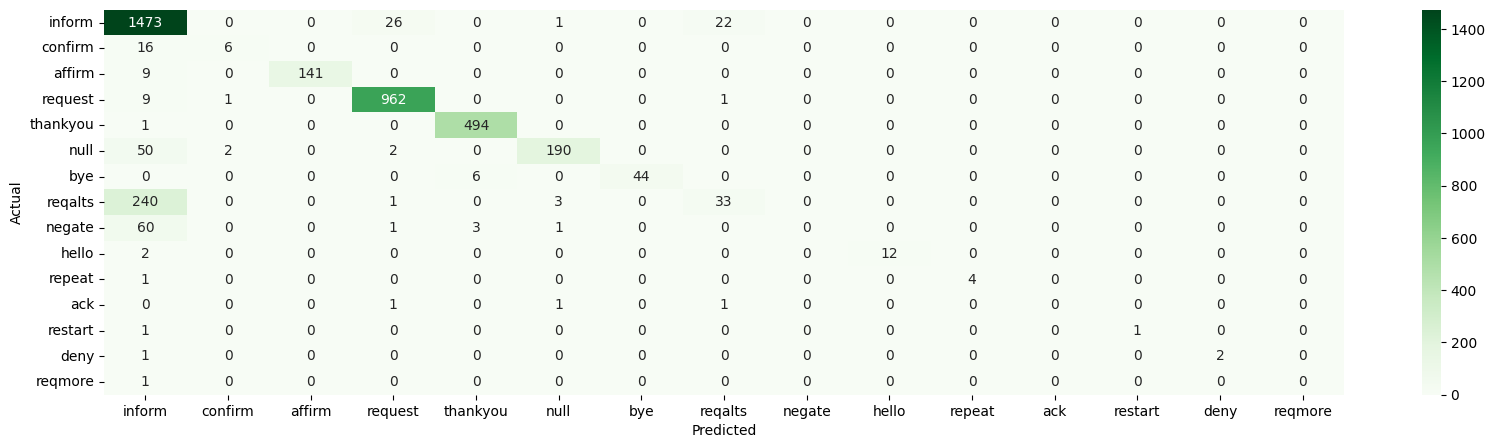

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt 

conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (20,5))
sns.heatmap(conf_mat, annot=True, cmap='Greens', fmt='d',
            xticklabels=label_dict.label.values, 
            yticklabels=label_dict.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [78]:
df.groupby('label').describe()

label_id                                         
            count  mean  std   min   25%   50%   75%   max
label                                                     
ack          28.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0
affirm     1156.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
bye         266.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0
confirm     172.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
deny         27.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0
hello        93.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0
inform    10160.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
negate      435.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0
null       1612.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
repeat       33.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
reqalts    1747.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0
reqmore       5.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0
request    6494.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0
restart      14.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0
thankyou   3259.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0